## Set up
In a class I took in undergrad, the professor liked to give a weekly quiz on a random day of the week, with 4 multiple choice questions, where there were 4 possible answers of being correct. Let's suppose that I am not a very good student and don't study at all, and resolve to simply guess on all of my answers. Suppose further than 100% of my grade is determined by these quizzes (We can change this later). What are the chances I get an A? B? C? Fail the class?

## A probabilistic answer

We can start simple, and try and add complexity as as we go. First, we'll suppose that I am in an academic quarter system of 10 weeks, so 100% of my grade is determined by 10 quizzes with 4 questions, where each question has 4 possible answers, and only *one* of them is correct. Assuming that my guesses are truly random, they'll be independent between questions, and quizzes. The probability I make the correct answer on any one question is $\frac{1}{4}$, since there is 1 right answer and 3 wrong ones. Each question attempt then represents a Bernoulli trial, and since my attempts on each question are independent, the probability I get $k \in \{0, 1, 2, 3, 4\}$ questions right on the quiz follows a binomial distribution with $n = 4$ and $p = 0.25$. If $X = \{ \text{Number of questions I get right on a quiz} \}$, then we can write the following:

$$P(X = k) = {4 \choose k } (p)^k (1-p)^{n - k}$$

We can then calculate the probabilites for $k = 0, 1, ..., 4$ by hand, but we can also use `R` to do this in a couple lines of code

In [1]:
outcomes <- c(0, 1, 2, 3, 4)
num_trials <- 4
probability <- 0.25

for (k in outcomes) {
    result <- dbinom(x = k, size = num_trials, prob = probability)
    result <- round(result, 3)
    answer <- sprintf("The probability of getting %d answers right is %s", k, result)
    print(answer)
}

[1] "The probability of getting 0 answers right is 0.316"
[1] "The probability of getting 1 answers right is 0.422"
[1] "The probability of getting 2 answers right is 0.211"
[1] "The probability of getting 3 answers right is 0.047"
[1] "The probability of getting 4 answers right is 0.004"


This doesn't look promising. But these are *exact* probabilities. What if I wanted to know the probability I get *at least* $k$ answers right? For sample, the probability I get *at least* 3 answers right is the probability I get 3 correct, or get 4 correct. So by the addition law in probability:

$$P(\{k = 3\} \cup \{k = 4\}) = P(\{k = 3\}) + P(\{k = 4\}) + P(\{k = 3\} \cap \{k = 4\})$$

Since I can't get both 3 answers and 4 answers correct on a multiple choice quiz, the furtherst  right term vanishes. So, we can really just add the probabilities. Recall that $P(X \leq k ) = 1 - P(X > k)$. So the probability of getting "at least $k$ answers right" is:

$$P(X \geq k ) = 1 - P(X < k) = 1 - P(X \leq k - 1 )$$

In [2]:
outcomes <- c(1, 2, 3, 4)
num_trials <- 4
probability <- 0.25

for (k in outcomes) {
    result <- 1 - pbinom(q = k - 1, size = num_trials, prob = probability)
    result <- round(result, 3)
    answer <- sprintf("The probability of getting at least %d answers right is %s", k, result)
    print(answer)
}

[1] "The probability of getting at least 1 answers right is 0.684"
[1] "The probability of getting at least 2 answers right is 0.262"
[1] "The probability of getting at least 3 answers right is 0.051"
[1] "The probability of getting at least 4 answers right is 0.004"


Cool. So things still aren't looking great. But that's just one quiz! We have 10 quizzes. That's more chances to do well, right? Since the sum of independent and identically distributed binomial random variables is itself a binomial random variable, we can model the probabilities for $k$ answers correct across all quizzes. We have 10 quizzes with 4 questions, so we have 40 possible questions to get right. Now assuming that we have no curving, and no plus/minus grades, the cut offs for an A, B, C, and D are 90%, 80%, 70%, and 60%. Anything below 60% is an F. That means the cut offs in correct number of quiz questions are 36, 32, 28, and 24, respectively. For now, we can look at the probabilities of getting *at least* an A, B, C, or D.

In [3]:
outcomes <- c(24, 28, 32, 36)
num_trials <- 40
probability <- 0.25

for (k in outcomes) {
    result <- 1 - pbinom(q = k - 1, size = num_trials, prob = probability)
    #result <- round(result, 3)
    answer <- sprintf("The probability of getting at least %d answers right is %s", k, result)
    print(answer)
}

[1] "The probability of getting at least 24 answers right is 2.8259666799979e-06"
[1] "The probability of getting at least 28 answers right is 2.84103096603872e-09"
[1] "The probability of getting at least 32 answers right is 4.53526105559376e-13"
[1] "The probability of getting at least 36 answers right is 0"


Not good. What's the probability of failing the class? It's just the probability you get less than 24 answers right, which in R can be coded as:

In [4]:
prob_fail <- pbinom(q = 24, size = num_trials, prob = probability)
sprintf("The probability you fail the class is %s", prob_fail)

[1] "The probability you fail the class is 0.999999412034064"

Y i k e s. The probability of getting an A grade by random guessing on 10 four question quizzes is so low that R is evaluating the probability to 0. Your probability of failing is essentially 100%. Bad strategy.

But let's make this more interesting. Suppose that instead of having hard cut offs, we curve the class by standardizing the scores and putting the mean at a C grade. Two standard deviations below the mean is an F, and two standard deviations above the mean is an A. Now, suppose we're in a class of 50 students, and test taking ability is essentially normally distributed. 

We can draw 50 students from the normal distribution with an assumed mean and standard deviation corresponding to final total quiz scores, and compute the within sample mean and standard deviation. Then, we can compute the probability we fail the class with our guessing strategy, based on the curve and the average ability of students.

(NB: If you're worried about scores being above 40, we can simply round it down to 40)

So let's suppose that, in the long run, quiz scores are around 28 and have a standard deviation of 5. Let's draw 50 final scores from this normal distribution.

In [5]:
set.seed(10)
fifty_scores <- round(rnorm(n = 50, mean = 28, sd = 5))
fifty_scores[fifty_scores > 40] = 40
sprintf("The mean score is %s", round(mean(fifty_scores)))
sprintf("The standard deviation is %s", round(sd(fifty_scores)))

[1] "The mean score is 26"

[1] "The standard deviation is 4"

So now, our new cut offs work in the following way: Within 1 standard deviation of the mean is a C, above 1 standard deviation above is a B, 1 standard deviation below is a D, 2 standard deviations above is an A, and finally, 2 standard deviations below is an F. Notice that even though we drew from a normal distribution with a mean of 28 and a standard deviation of 5, the within sample mean is 26, with a standard deviation of 4.

So in this case, we get the following grading scheme, let $x$ denote someone's score

$$A: x > 34 \\
B: 30 < x \leq 34\\
C: 22 \leq x \leq 30\\
D: 18 \leq x < 22\\
F: x < 18$$

If it looks like it's easy to get a C in this class, that's because it is. 

In [6]:
num_trials <- 40
probability <- 0.25

prob_fail <- pbinom(q = 17, size = num_trials, prob = probability)
sprintf("The probability you fail the class is %s", round(prob_fail, 4))

[1] "The probability you fail the class is 0.9953"

This is still pretty bad, but let's see if we can be more realistic about our model. First, no student guesses entirely randomly on every single question, and no multiple choice exam has choices that are all equally probable. As anyone who has done standardized testing knows, if there are 4 multiple choice answers, usually 2 of them are "obviously wrong" and the difficulty is in selecting between the other two. Suppose that our hypothetical class is set up in this way, where each question has two obviously wrong answers and two seemingly correct answers, and the task is in selecting between the latter two. If this seems unrealistic, we can argue that the student at least goes to lecture and maybe does a little reading, but is otherwise just trying to "skate by". In this case, we might assume that the probability of selecting the right answer is 50% instead of 25%, since we are just going to randomly guess between the two "seemingly correct" answers.

In [7]:
num_trials <- 40
probability <- 0.50

prob_fail <- pbinom(q = 17, size = num_trials, prob = probability)
sprintf("The probability you fail the class is %s", round(prob_fail, 3))

[1] "The probability you fail the class is 0.215"

Not bad. If you're looking to slack off, then (about) 4 times out of 5, if you can reduce each question to a guess between two seemingly right answers, and just give a total guess, you will pass a class. But if we look at the calculations below, the probability we get an $A$ is basically 0. But, the probability we get at least a $C$ grade is a surprising $\approx 32\%$

In [8]:
outcomes <- c(18, 22, 30, 34)
num_trials <- 40
probability <- 0.65

for (k in outcomes) {
    result <- 1 - pbinom(q = k - 1, size = num_trials, prob = probability)
    #result <- round(result, 3)
    answer <- sprintf("The probability of getting at least %d answers right is %s", k, result)
    print(answer)
}

[1] "The probability of getting at least 18 answers right is 0.997002775978406"
[1] "The probability of getting at least 22 answers right is 0.930081002932577"
[1] "The probability of getting at least 30 answers right is 0.121491905808092"
[1] "The probability of getting at least 34 answers right is 0.00436300692871394"


All this really says is that you can get away with doing very little and still pass a curved class, but in some sense, our assumptions are too restrictive and case specific. I've never heard of a class weighting 100% of your grade on quizzes, have you?

Let's complicate the model. We are going to do a few things. First, let's create a more realistic testing environment. Let's imagine that the class is composed of 7 quizzes, a midterm, and a final. In most classes I've personally had, finals count for 30% to 60% of your final grade, quizzes count for between 10% to 30%, and a midterm is usually weighted about the same as a quiz. Let's choose the following grade break down:

$$30\% Quizzes + 30\% Midterm + 40\% Final = 100\% Final Grade$$.

For the sake of our model, we'll assume everything is multiple choice with 4 possible answers (I have seen some physics classes organized in this way). We'll say that there are five quizzes of 5 questions each(so 25 total), the midterm has 15 questions, and the final has 30 questions. In total, we have 70 multiple choice questions for this physics class. 

We'll also drop the assumption that final scores of the cohort are normally distributed with a fixed mean. Instead, let's actually model the abilities of students. We'll say that an $F$ student just randomly guesses on each answer, a $D$ student gets an answer right with probability 60%, a $C$ student gets an answer right with probability 70%, a $B$ student gets an answer right with probability 80%, and an $A$ student gets an answer right with probability 95%. (Why these numbers? Mostly because they match our intuition.)


The reason for using a bell curve style of grading is we are assuming that student ability normally distributed. A normal distribution has approximately 68% of students within 1 standard deviation of the mean, 95% within two standard deviations, and 99.7% within 3 standard deviations. What we'll do is draw 50 numbers from a standard normal distribution and organize them by their standard deviation to the mean. Depending where they fall on that standard deviation, we'll map them to their ability. E.g., if a number is within 1 standard deviation of the mean, we'll map them to the $C$ student who gets answers right with probability 65%. We'll populate the class in this way, and the result should be a class that has normally distributed test taking ability. 

As for the grading scheme, we'll grade in this way. The top 20% of the class gets an $A$, the next 30% gets a $B$, the next 30% get a $C$, and the next 10% get a $D$ and the final 10% get an $F$.

In [9]:
#draw students from a standard normal
students <- rnorm(n = 50)

#to hold scores
class_quiz_scores <- c()
class_midterm_scores <- c()
class_final_scores <- c()

#constants
num_quiz_qs <- 25
num_midterm_qs <- 15
num_final_qs <- 30

F_prob <- 0.25
D_prob <- 0.60
C_prob <- 0.70
B_prob <- 0.80
A_prob <- 0.95

#iterate through students
for (student in students) {
    
    # < -2 = F student
    if (student < -2) {
        
        #simulate student scores
        quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = F_prob)
        midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = F_prob)
        final_score <- rbinom(n = 1, size = num_final_qs, prob = F_prob)
        
        #append student scores
        class_quiz_scores <- c(class_quiz_scores, quiz_score)
        class_midterm_scores <- c(class_midterm_scores, midterm_score)
        class_final_scores <- c(class_final_scores, final_score)
        
    }
    
    # D students
    if (student > -2 && student < -1) {
        
        #simulate student scores
        quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = D_prob)
        midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = D_prob)
        final_score <- rbinom(n = 1, size = num_final_qs, prob = D_prob)
        
        #append student scores
        class_quiz_scores <- c(class_quiz_scores, quiz_score)
        class_midterm_scores <- c(class_midterm_scores, midterm_score)
        class_final_scores <- c(class_final_scores, final_score)
        }
    
    # C students
    if (student > -1 && student < 1) {
        
        #simulate student scores
        quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = C_prob)
        midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = C_prob)
        final_score <- rbinom(n = 1, size = num_final_qs, prob = C_prob)
        
        #append student scores
        class_quiz_scores <- c(class_quiz_scores, quiz_score)
        class_midterm_scores <- c(class_midterm_scores, midterm_score)
        class_final_scores <- c(class_final_scores, final_score)
        }
    
    # B students
    if (student > 1 && student < 2) {
        
        #simulate student scores
        quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = B_prob)
        midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = B_prob)
        final_score <- rbinom(n = 1, size = num_final_qs, prob = B_prob)
        
        #append student scores
        class_quiz_scores <- c(class_quiz_scores, quiz_score)
        class_midterm_scores <- c(class_midterm_scores, midterm_score)
        class_final_scores <- c(class_final_scores, final_score)
        }
    
    # A students
    if (student > 2) {
        
        #simulate student scores
        quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = A_prob)
        midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = A_prob)
        final_score <- rbinom(n = 1, size = num_final_qs, prob = A_prob)
        
        #append student scores
        class_quiz_scores <- c(class_quiz_scores, quiz_score)
        class_midterm_scores <- c(class_midterm_scores, midterm_score)
        class_final_scores <- c(class_final_scores, final_score)
        }
}

#weight each score for the grade
final_grades <- (0.30 * class_quiz_scores) + (0.30 * class_midterm_scores) + (0.40 * class_final_scores)



And here are the quantiles. Below 10% is an $F$, between 10 and 20% is a $D$, between 20 and 50% is a $C$, between 50 and 80% is a $B$, and above 80% is an $A$.

In [33]:
quantile(final_grades, probs = c(0.10, 0.20, 0.50, 0.80))

10%   20%   50%   80% 
12.17 13.64 16.55 18.46

In [34]:
cutoffs <- quantile(final_grades, probs = c(0.10, 0.20, 0.50, 0.80))
num_F <- sum(final_grades < cutoffs[1])
num_D <- sum(final_grades < cutoffs[2] & final_grades > cutoffs[1])
num_C <- sum(final_grades < cutoffs[3] & final_grades > cutoffs[2])
num_B <- sum(final_grades < cutoffs[4] &  final_grades > cutoffs[3])
num_A <- sum(final_grades > cutoffs[4])

sprintf("There are %s F students, %s D students, %s C students, %s B students, and %s A students",
        num_F, num_D, num_C, num_B, num_A)

[1] "There are 5 F students, 5 D students, 15 C students, 15 B students, and 10 A students"

Essentially what we have done is 

1) Randomly generate a class of students from a normal distribution. 

2) Assign each student a probabilistic final score in the class based on their abilities.

3) Use a deterministic cut off in the way universities sometimes do. 

The thing to note about the quantile cut off is that, regardless of the class performance, at least 10% of the class will recieve a failing grade. 

Now, what's the probability we fail the class? We will compute this as a long term average. We'll calculate our score seperate from the class generating process (as a function of the probability we get the answer right), and append it to the final scores to calculate our cut offs. Then we'll note if we failed the class or not. We'll repeat this process an extremely large number of times. The proportion of times we failed the class will then give us the probability we fail the class.

The below code block just takes the work we've done so far and converts it into a function that we can use to simulate a lot of classroom outcomes. In each case, we count the number of times we failed, got a C, B, or A, and divide it by the number of simulations we did to compute the probability.

(NB: This function is NOT optimized, and is very slow, but it gets the job done.)

In [100]:
F_prob <- 0.25
D_prob <- 0.60
C_prob <- 0.70
B_prob <- 0.80
A_prob <- 0.95

estimator <- function(iter = 100, my_prob = 0.50, num_stud = 50){
    
    #to hold results
    times_F <- 0
    times_D <- 0
    times_C <- 0
    times_B <- 0
    times_A <- 0
    count <- 0
    
    for (i in 1:iter) {
        #iterate through students
        #draw students from a standard normal
        students <- rnorm(n = num_stud)
        
        #to hold scores, needs to be refreshed every time. 
        
        class_quiz_scores <- c()
        class_midterm_scores <- c()
        class_final_scores <- c()
        
        
        for (student in students) {
    
            # < -2 = F student
            if (student < -2) {
        
                #simulate student scores
                quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = F_prob)
                midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = F_prob)
                final_score <- rbinom(n = 1, size = num_final_qs, prob = F_prob)
        
                #append student scores
                class_quiz_scores <- c(class_quiz_scores, quiz_score)
                class_midterm_scores <- c(class_midterm_scores, midterm_score)
                class_final_scores <- c(class_final_scores, final_score)
            }
    
            # D students
            if (student > -2 & student < -1) {
        
                #simulate student scores
                quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = D_prob)
                midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = D_prob)
                final_score <- rbinom(n = 1, size = num_final_qs, prob = D_prob)
        
                #append student scores
                class_quiz_scores <- c(class_quiz_scores, quiz_score)
                class_midterm_scores <- c(class_midterm_scores, midterm_score)
                class_final_scores <- c(class_final_scores, final_score)
                }
    
            # C students
            if (student > -1 & student < 1) {
        
                #simulate student scores
                quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = C_prob)
                midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = C_prob)
                final_score <- rbinom(n = 1, size = num_final_qs, prob = C_prob)
        
                #append student scores
                class_quiz_scores <- c(class_quiz_scores, quiz_score)
                class_midterm_scores <- c(class_midterm_scores, midterm_score)
                class_final_scores <- c(class_final_scores, final_score)
                }
    
            # B students
            if (student > 1 & student < 2) {
        
                #simulate student scores
                quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = B_prob)
                midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = B_prob)
                final_score <- rbinom(n = 1, size = num_final_qs, prob = B_prob)
        
                #append student scores
                class_quiz_scores <- c(class_quiz_scores, quiz_score)
                class_midterm_scores <- c(class_midterm_scores, midterm_score)
                class_final_scores <- c(class_final_scores, final_score)
                }
    
            # A students
            if (student > 2) {
        
                #simulate student scores
                quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = A_prob)
                midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = A_prob)
                final_score <- rbinom(n = 1, size = num_final_qs, prob = A_prob)
        
                #append student scores
                class_quiz_scores <- c(class_quiz_scores, quiz_score)
                class_midterm_scores <- c(class_midterm_scores, midterm_score)
                class_final_scores <- c(class_final_scores, final_score)
                }
        }

            
        
            #simulate my scores
        my_quiz_score <- rbinom(n = 1, size = num_quiz_qs, prob = my_prob)
        my_midterm_score <- rbinom(n = 1, size = num_midterm_qs, prob = my_prob)
        my_final_score <- rbinom(n = 1, size = num_final_qs, prob = my_prob)
        
        #append student scores
        class_quiz_scores <- c(class_quiz_scores, my_quiz_score)
        class_midterm_scores <- c(class_midterm_scores, my_midterm_score)
        class_final_scores <- c(class_final_scores, my_final_score)
        
        #calculate final grades according to weighting scheme
        final_grades <- (0.30 * class_quiz_scores) + (0.30 * class_midterm_scores) + (0.40 * class_final_scores)

        #calculate my score
        my_score <- (0.30 * my_quiz_score) + (0.30 * my_midterm_score) + (0.40 * my_final_score)
        
        #calculate quantiles
        cutoffs <- quantile(final_grades, probs = c(0.10, 0.20, 0.50, 0.80))
        
        count <- count + 1
        
        if (my_score < cutoffs[1]){
            
            times_F <- times_F + 1
        }
        
        else if (my_score < cutoffs[2] & my_score >= cutoffs[1]) {
            
            times_D <- times_D + 1
        }
        else if (my_score < cutoffs[3] & my_score >= cutoffs[2]) {
            
            times_C <- times_C + 1
        }
        else if (my_score < cutoffs[4] & my_score >= cutoffs[3]) {
            
            times_B <- times_B + 1
        }
        else if (my_score >= cutoffs[4]) {
            
            times_A <- times_A + 1
        }
    }
    
    #calculate final probabilities
    result_F <- times_F / iter
    result_D <- times_D / iter
    result_C <- times_C / iter
    result_B <- times_B / iter
    result_A <- times_A / iter
    total <- times_F + times_D + times_C + times_B + times_A

    sprintf("The probability of an F is %s, a D is %s, a C is %s, a B is %s, and an A is %s", 
             result_F, result_D, result_C, result_B, result_A)
    
    return(1 - result_F)
    #return(final_grades)
}

Now, we can call our function and calculate the long run probability of our final grade in the class as a function of our individual probability of getting any question correct. We'll assume that we are in a class of 100 students. To get stable estimates, we'll use 5000 simulations for each probability estimate, and then plot the probability of us passing the class as a function of our ability to get a question right.

(NB: The following block of code is very slow, but works).

In [101]:
results <- c()
for (i in seq(0, 1, by = 0.01)) {
    p <- estimator(iter = 5000, my_prob = i, num_stud = 100)
    results <- c(results, p)
}

data <- data.frame("probability_pass" = results, "prob_guess_right" = seq(0, 1, by = 0.01))

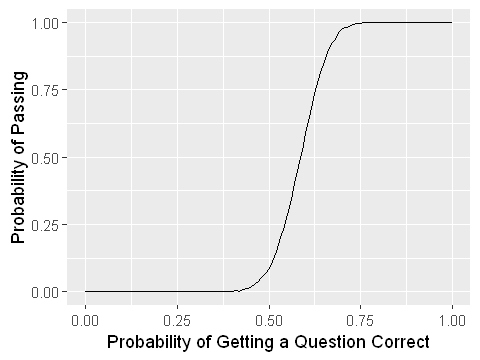

In [102]:
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data = data) +
    geom_line(aes(x = prob_guess_right, y = probability_pass)) +
    ylab("Probability of Passing") +
    xlab("Probability of Getting a Question Correct")

Looking at the graph, we can see pretty sharp changes in your probability of passing the class. It looks like under no circumstances is a coin-flip chance of getting any question right a useful strategy, but surprisingly, the probability of passing is actually non-zero in this curved grading scheme. But, if your probability of getting any question right is about 62.5%, then your probability of passing the class explodes to 75%. If you can get 75% of the answers right, then you're essentially garunteed to pass. These things match our intuition.

Possible Model improvements:

1) What's the best way to model student ability? Here we make explicit assumptions that student ability is normally distributed, and we also made explicit assumptions on about how many questions a $F, D, C, B,$ or $A$ student gets right. We might be able to add another layer of randomness here by instead drawing from a fat-tailed distribution (which is often more reflective of real life) or by adding random error to average proportion of questions a student gets right. 

2) Failing 10% of the class might be unrealistic. A 5% fail rate is probably more reflective of reality. Or use two cutoffs, which I have seen some professors do. Usually it goes like this - Your grade is the higher of two options: raw percentage, relative standing in the class. E.g., if my raw score is 72%, but I'm in the bottom 5% of the class, I still get a C/C- grade. 